In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid')

import sys

In [3]:
sys.path.append('../../read_from_sql/')
import read_from_sql
sys.path.append('/Users/vonderlinden2/rsx_analysis/mach_probe_analysis')
sys.path.append('/Users/vonderlinden2/rsx_analysis/time_alignment/source/')
import ion_current_to_mach_number as ic_to_mach
reload(ic_to_mach)
sys.path.append('/Users/vonderlinden2/rsx_analysis/time_alignment/source')
import absolute_times as at

import structured_3d_vtk as struc_3d
reload(struc_3d)

<module 'structured_3d_vtk' from 'structured_3d_vtk.pyc'>

# Order $B_x$ measurements

In [4]:
bx_measurements = struc_3d.read_idl('bx')

for plane in [0.249, 0.302, 0.357, 0.416]:
    bx_measurements[plane] = struc_3d.average_duplicate_points(bx_measurements[plane])

In [13]:
x_index_sort = np.argsort(bx_measurements[0.249]['x_out'])

In [30]:
bx_x_sorted = bx_measurements[0.249]['x_out'][x_index_sort]
bx_y_sorted = bx_measurements[0.249]['y_out'][x_index_sort]

In [31]:
x_coordinate_counts = np.unique(bx_x_sorted, return_counts=True)[1]

In [32]:
bx_x_rowed = []
bx_y_rowed = []
position = 0
for count in x_coordinate_counts:
    bx_x_rowed.append(bx_x_sorted[position:position+count])
    bx_y_rowed.append(bx_y_sorted[position:position+count])
    position += count

In [34]:
bx_x_rowed

[array([-0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032,
        -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032,
        -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032,
        -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032,
        -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032,
        -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032, -0.032,
        -0.032]),
 array([-0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027,
        -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027,
        -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027]),
 array([-0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027,
        -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027,
        -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027,
        -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027, -0.027]),
 array([-0.024, -0.024, -0.024, -0.024, -0

In [35]:
bx_y_rowed

[array([ 0.015,  0.009,  0.018, -0.012, -0.003, -0.015,  0.018, -0.024,
        -0.057,  0.012,  0.007, -0.039,  0.003,  0.028, -0.051, -0.027,
         0.013, -0.009, -0.036, -0.009, -0.06 , -0.03 ,  0.025,  0.012,
         0.006,  0.031, -0.039,  0.006,  0.022,  0.006,  0.003,  0.024,
        -0.054, -0.045, -0.048, -0.054,  0.019,  0.016,  0.015,  0.   ,
         0.01 ,  0.004, -0.006, -0.033,  0.009, -0.042,  0.003,  0.021,
        -0.006]),
 array([-0.016, -0.025, -0.025, -0.05 , -0.01 , -0.019,  0.017, -0.028,
        -0.013, -0.031,  0.011, -0.016,  0.023,  0.017,  0.008, -0.019,
        -0.053, -0.056,  0.02 ,  0.014,  0.014, -0.047, -0.022, -0.007]),
 array([ 0.026,  0.008,  0.041,  0.026, -0.041, -0.007, -0.004,  0.038,
         0.005, -0.013, -0.035,  0.029,  0.029, -0.01 ,  0.005,  0.002,
         0.002, -0.044,  0.02 , -0.001,  0.023,  0.032, -0.004,  0.032,
        -0.029,  0.011, -0.038, -0.016, -0.019, -0.032, -0.001,  0.035]),
 array([-0.067     , -0.07      ,  0.014  

In [15]:
bx_measurements[0.249]['y_out'][x_index_sort]

array([ 0.015     ,  0.009     ,  0.018     , -0.012     , -0.003     ,
       -0.015     ,  0.018     , -0.024     , -0.057     ,  0.012     ,
        0.007     , -0.039     ,  0.003     ,  0.028     , -0.051     ,
       -0.027     ,  0.013     , -0.009     , -0.036     , -0.009     ,
       -0.06      , -0.03      ,  0.025     ,  0.012     ,  0.006     ,
        0.031     , -0.039     ,  0.006     ,  0.022     ,  0.006     ,
        0.003     ,  0.024     , -0.054     , -0.045     , -0.048     ,
       -0.054     ,  0.019     ,  0.016     ,  0.015     ,  0.        ,
        0.01      ,  0.004     , -0.006     , -0.033     ,  0.009     ,
       -0.042     ,  0.003     ,  0.021     , -0.006     , -0.016     ,
       -0.025     , -0.025     , -0.05      , -0.01      , -0.019     ,
        0.017     , -0.028     , -0.013     , -0.031     ,  0.011     ,
       -0.016     ,  0.023     ,  0.017     ,  0.008     , -0.019     ,
       -0.053     , -0.056     ,  0.02      ,  0.014     ,  0.01

In [16]:
mesh = np.meshgrid(np.linspace(0, 5, 4), np.linspace(10, 15, 4))

In [17]:
mesh

[array([[ 0.        ,  1.66666667,  3.33333333,  5.        ],
        [ 0.        ,  1.66666667,  3.33333333,  5.        ],
        [ 0.        ,  1.66666667,  3.33333333,  5.        ],
        [ 0.        ,  1.66666667,  3.33333333,  5.        ]]),
 array([[ 10.        ,  10.        ,  10.        ,  10.        ],
        [ 11.66666667,  11.66666667,  11.66666667,  11.66666667],
        [ 13.33333333,  13.33333333,  13.33333333,  13.33333333],
        [ 15.        ,  15.        ,  15.        ,  15.        ]])]

In [39]:
from matplotlib.tri import Triangulation, LinearTriInterpolator

In [71]:
bx_measurements = struc_3d.read_idl('bx')
by_measurements = struc_3d.read_idl('by')

for plane in [0.249, 0.302, 0.357, 0.416]:
    bx_measurements[plane] = struc_3d.average_duplicate_points(bx_measurements[plane])
    by_measurements[plane] = struc_3d.average_duplicate_points(by_measurements[plane])

In [78]:
by_measurements[0.249]['a_out'][0][:, 0].shape

(694,)

In [79]:
by_measurements[0.249]['x_out'].shape

(694,)

In [73]:
triangulation_bx = Triangulation(bx_measurements[0.249]['x_out'], bx_measurements[0.249]['y_out'])

In [80]:
interpolation_bx = LinearTriInterpolator(triangulation_bx, bx_measurements[0.249]['a_out'][0][:, 0])

In [81]:
triangulation_by = Triangulation(by_measurements[0.249]['x_out'], by_measurements[0.249]['y_out'])
interpolation_by = LinearTriInterpolator(triangulation_by, by_measurements[0.249]['a_out'][0][:, 0])

In [83]:
spatial_increment = 0.001
x_min, x_max = -0.027, 0.022
y_min, y_max = -0.021, 0.0295 
mesh = np.meshgrid(np.linspace(x_min, x_max, np.ceil((x_max-x_min)/spatial_increment)), 
                   np.linspace(y_min, y_max, np.ceil((y_max-y_min)/spatial_increment)))

In [89]:
j_z = (np.asarray(interpolation_by.gradient(mesh[0], mesh[1]))[0] - 
       np.asarray(interpolation_bx.gradient(mesh[0], mesh[1]))[1])/(1.26e-6)

In [90]:
np.max(j_z)

426560.10185871675

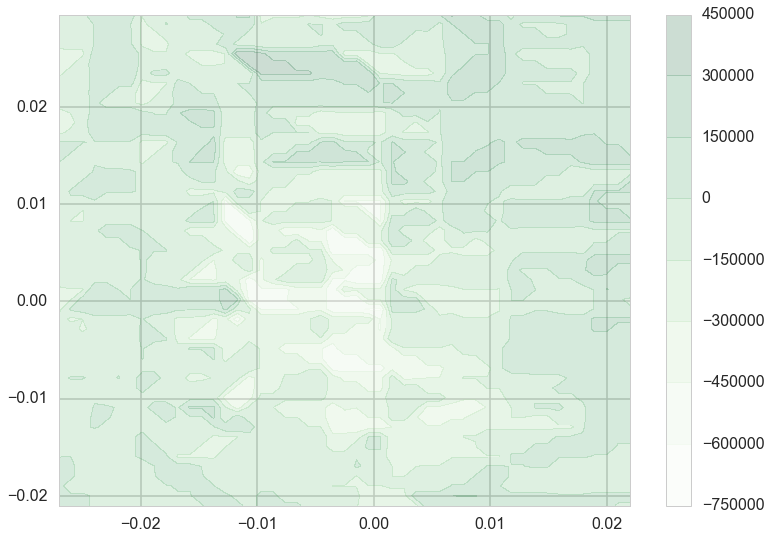

In [93]:
plt.contourf(mesh[0], mesh[1], 
             j_z, alpha=0.2, cmap='Greens')
plt.colorbar()